In [31]:
# FS conversion of CM's FFT & SciPy lecture notebooks: 
#        * port to Python 3, e.g. len() and print()
#        * use np. prefix to make it clear we're using numpy methods
#        * use scipy.io.wavfile to read sound
#        * use matplotlib.pyplot for plotting
#        * // instead of / for integer division

%matplotlib inline 

import numpy as np
import pylab
import matplotlib.pyplot as plt

# Although there are Fourier-related methods in NumPy, 
# seemingly we are supposed to use the SciPy ones so that
# eventually NumPy becomes a numbers-oriented, rather than
# higher-level methods-oriented library.

from scipy.fftpack import rfft, rfftfreq, irfft, fft, fftfreq
from scipy.io import wavfile

# Graphing helper function
def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    

# Make up a signal/wave

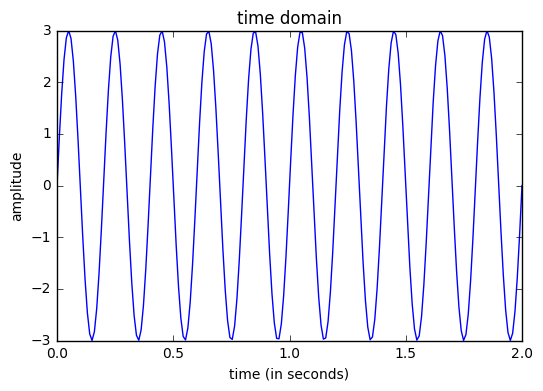

In [32]:

freq = 5 # In Hertz (Hz,) the number of cycles per second
amplitude = 3 # Height of the wave

time_to_plot = 2 # seconds
sample_rate = 100 # In Hz, the number of samples per second
t = np.linspace(0, time_to_plot, sample_rate * time_to_plot)

signal = amplitude * np.sin(freq * 2 * np.pi * t) # Explain the 2*pi

setup_graph(x_label='time (in seconds)', y_label='amplitude', title='time domain')

plt.plot(t, signal)

# Convert to the frequency domain

The biggest amplitude frequency is 5 Hz


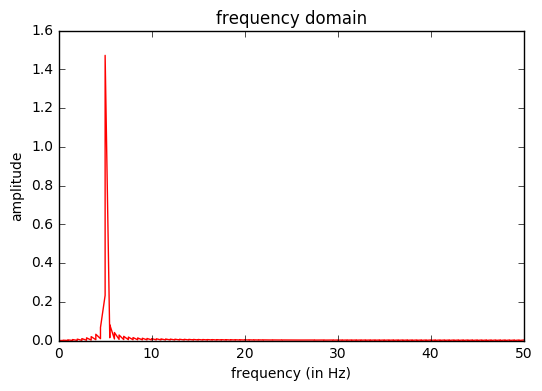

In [33]:
# Use rfft for signals with real numbers only, no imaginary parts. 
# It avoids computing the imaginary output which would be the same as
# the real output.

fft_output = rfft(signal) 

fft_magnitude_only = np.abs(fft_output) / len(fft_output)

frequencies_fft = rfftfreq(len(signal),1/sample_rate) # Calculate all possible frequencies in signal.

setup_graph(x_label='frequency (in Hz)', y_label='amplitude', title='frequency domain')

plt.plot(frequencies_fft, fft_magnitude_only, 'r')

print('The biggest amplitude frequency is %0.f Hz' %frequencies_fft[np.argmax(fft_magnitude_only)])

## Question: So what does the Fourier Transform give us?

* The amplitudes of simple sine waves
* Their starting position - phase (we won't get into this part much)

## Question: what sine wave frequencies are used?

* Answer: This is determined by how many samples are provided to the Fourier Transform
* Frequencies range from 0 to 1/2 the number of samples
* **Example: If your sample rate is 100Hz, and you give the FFT 100 samples, the FFT will return the amplitude of the components with frequencies 0 to 50Hz.**

In [34]:
# Read them in from files and convert them from what whatever format they're stored in into a list of numbers.

(sample_rate_eh, input_signal_eh) = wavfile.read("audio_files/vowel_eh.wav")
(sample_rate_ah, input_signal_ah) = wavfile.read("audio_files/vowel_ah.wav")

print('Number of individual samples in Eh signal is ...', len(input_signal_eh))
print('The sampling rate should be twice the approx max frequency of human hearing (22 kHz) ...', sample_rate_eh)

Number of individual samples in Eh signal is ... 111616
The sampling rate should be twice the approx max frequency of human hearing (22 kHz) ... 44100


In [35]:
# Make a list of times, one for each sample. Assume sample rate is in Hz so times are in seconds.

time_array_eh = np.arange(0, len(input_signal_eh)/sample_rate_eh, 1/sample_rate_eh)
time_array_ah = np.arange(0, len(input_signal_ah)/sample_rate_ah, 1/sample_rate_ah)

# To avoid too much calculation, let's use signal durations of only 1/10th second.

time_array_eh = time_array_eh[0:(sample_rate_eh//10)+2]
time_array_ah = time_array_ah[0:(sample_rate_ah//10)+2]

input_signal_eh = input_signal_eh[0:(sample_rate_eh//10)+2]
input_signal_ah = input_signal_ah[0:(sample_rate_eh//10)+2]

print(len(time_array_eh))
print(len(input_signal_eh))


4412
4412


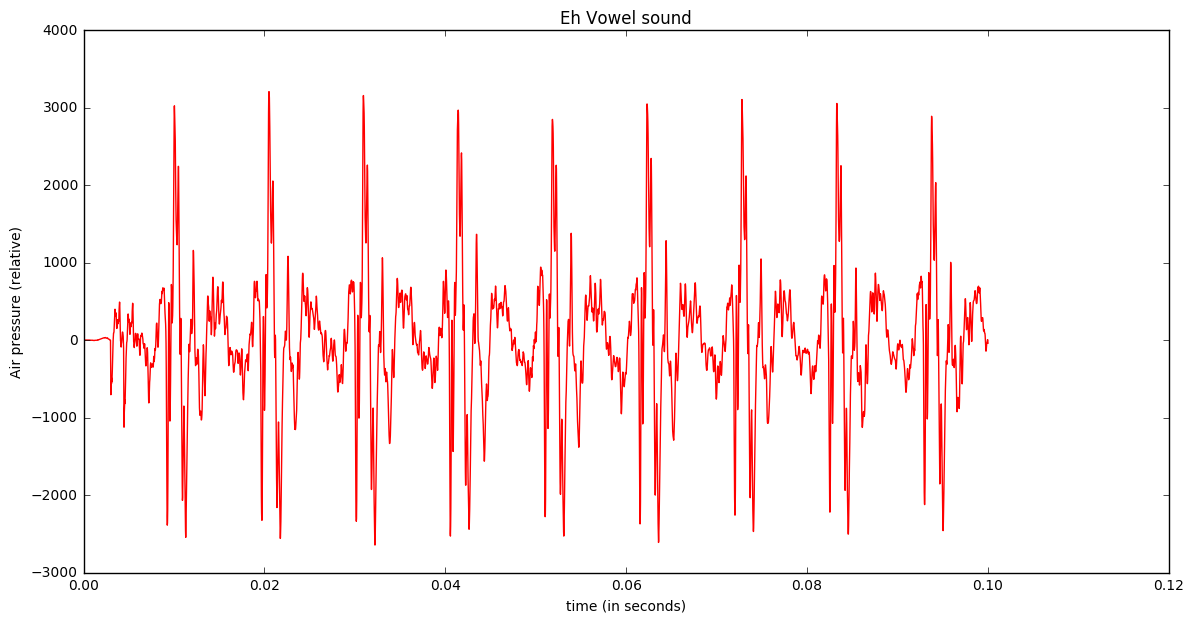

In [36]:
# Plot sound pressure level versus time

setup_graph(title='Eh Vowel sound', x_label='time (in seconds)', y_label='Air pressure (relative)', fig_size=(14,7))

plt.plot(time_array_eh, input_signal_eh,color='r')
plt.show()

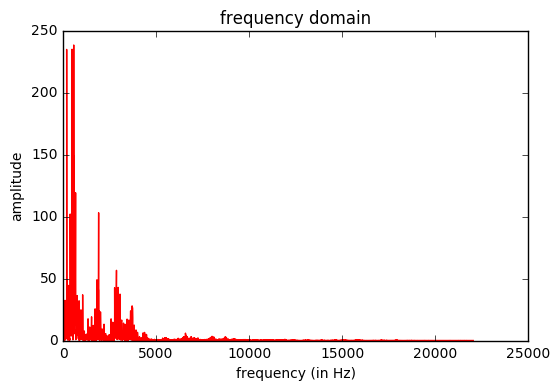

In [37]:
fft_output_eh = rfft(input_signal_eh)

fft_magnitude_only_eh = np.abs(fft_output_eh) / len(fft_output_eh)

frequencies_fft_eh = rfftfreq(len(input_signal_eh),1/sample_rate_eh) # Calculate all possible frequencies in signal.

setup_graph(x_label='frequency (in Hz)', y_label='amplitude', title='frequency domain')

plt.plot(frequencies_fft_eh, fft_magnitude_only_eh, 'r')


# Look at the frequency with the biggest amplitude.

The biggest amplitude frequency is 569.7 Hz


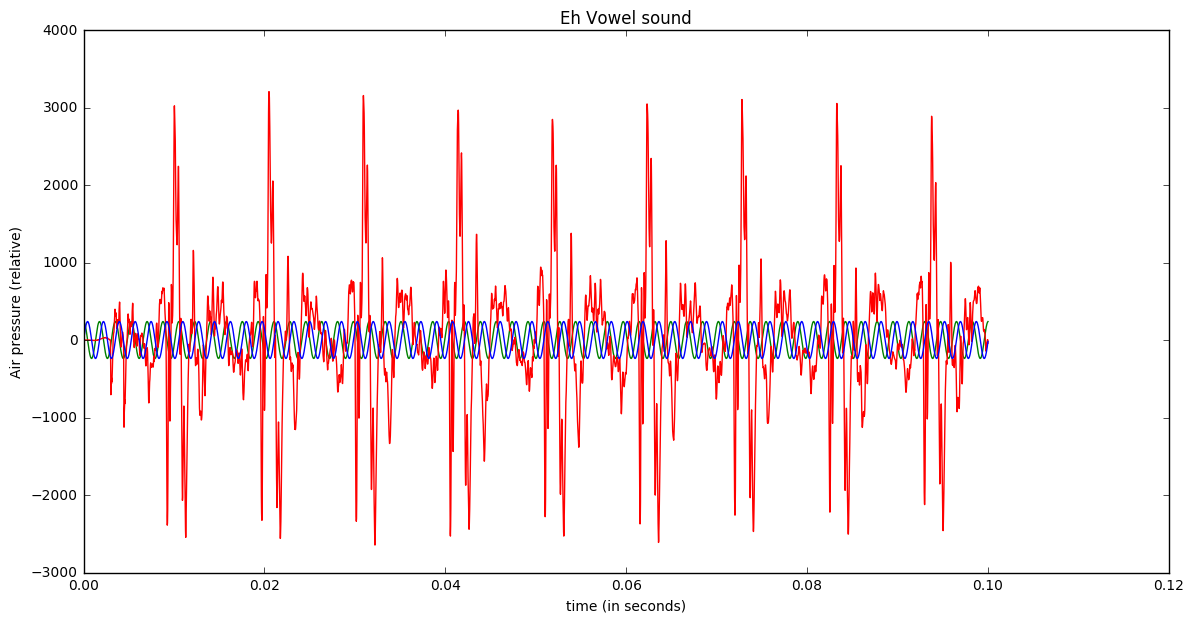

In [38]:
# Get the frequency with the biggest amplitude.
max_freq_idx = np.argmax(fft_magnitude_only_eh) 
max_freq_eh = frequencies_fft_eh[ max_freq_idx ] 

print('The biggest amplitude frequency is {:0.1f} Hz'.format(max_freq_eh))

# Have a look to see whether this frequency makes sense wrt the original data!
setup_graph(title='Eh Vowel sound', x_label='time (in seconds)', y_label='Air pressure (relative)', fig_size=(14,7))

cos_max_freq_eh =  np.cos(max_freq_eh * 2 * np.pi * time_array_eh) * fft_magnitude_only_eh[max_freq_idx]
sin_max_freq_eh =  np.sin(max_freq_eh * 2 * np.pi * time_array_eh) * fft_magnitude_only_eh[max_freq_idx]

plt.plot(time_array_eh, cos_max_freq_eh, color='g')
plt.plot(time_array_eh, input_signal_eh, color='r')
plt.plot(time_array_eh, sin_max_freq_eh, color='b')


plt.show()

# Look at the (sum of the) first n frequencies.

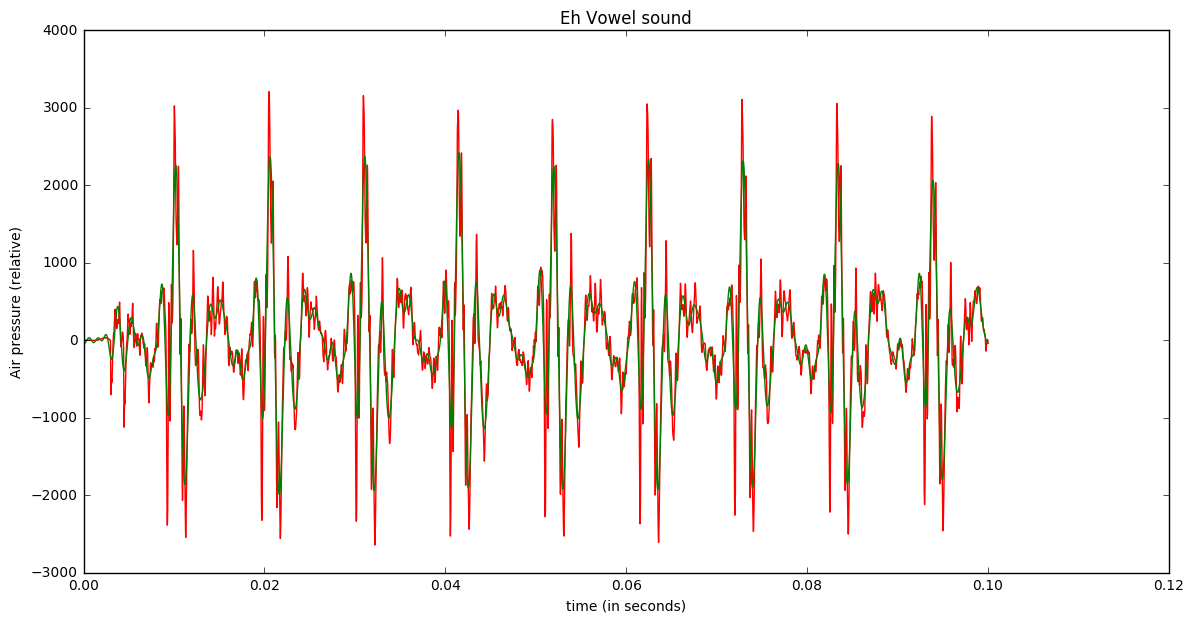

In [39]:
# Similar to the above using but getting a range of frequencies 
# and using inverse FFT method to construct signal to plot

partial_fft_range = np.arange(0, 200, 1)

partial_fft_output_eh = np.zeros(len(fft_output_eh))

partial_fft_output_eh[partial_fft_range] = fft_output_eh[partial_fft_range]

partial_input_signal_eh = irfft(partial_fft_output_eh)

setup_graph(title='Eh Vowel sound', x_label='time (in seconds)', y_label='Air pressure (relative)', fig_size=(14,7))

plt.plot(time_array_eh, input_signal_eh, color='r')
plt.plot(time_array_eh, partial_input_signal_eh, color='g')

plt.show()

# Look at (the sum of) the n frequencies with the biggest amplitudes.


The top 10 frequencies are [  569.74161378   479.7824116    189.91387126   579.73708069   669.69628286
  1909.13417951   379.82774252   569.74161378   469.7869447    589.7325476 ]


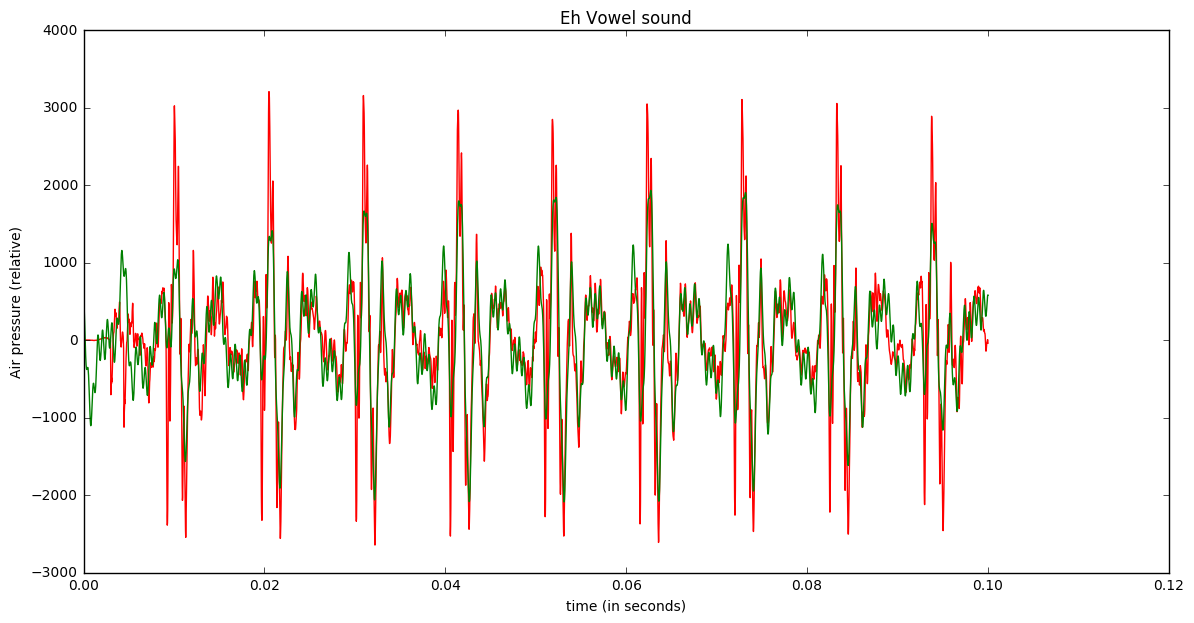

In [92]:
# Similar to the above but getting the top n frequencies and plotting their sum.

top = 10 # The number of maxima we want to find

# Get their indices in the array. Found this syntax on StackOverflow. 
idx = (-fft_magnitude_only_eh).argsort()[:top] 

print('The top {} frequencies are {}'.format(top,frequencies_fft_eh[idx]))

partial_fft_output_eh = np.zeros(len(fft_output_eh))

partial_fft_output_eh[idx] = fft_output_eh[idx]

partial_input_signal_eh = irfft(partial_fft_output_eh)

setup_graph(title='Eh Vowel sound', x_label='time (in seconds)', y_label='Air pressure (relative)', fig_size=(14,7))

plt.plot(time_array_eh, input_signal_eh, color='r')
plt.plot(time_array_eh, partial_input_signal_eh, color='g')

plt.show()

# Lab Assignment: Work out why the amplitudes of the ifft plot above and the cos plot are different.

In [ ]:
#The plot above is the inverse fast fourier transform which is a sum of sines and cosines, not only cosine funtion.
#Also the graph above is the sum of the 10 most representative frequencies. As more frequencies we sum, we would represent the
#original function better. If we change the above graph to only 1 frequency, and if we sum the cosine plot their sine part,
#the graph should be the same.

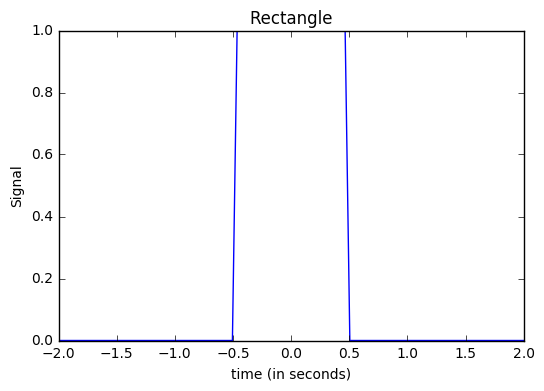

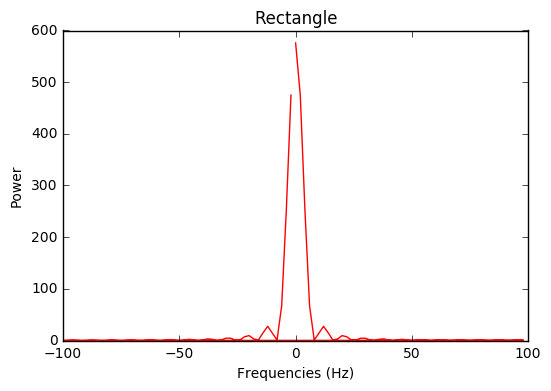

In [46]:
x = np.linspace(-2,2,100)
rect = np.piecewise(x, [np.abs(x)>0.5, np.abs(x)==0.5, np.abs(x)<0.5], [0, 0.5, 1])
setup_graph(x_label='time (in seconds)', y_label='Signal', title='Rectangle')

plt.plot(x, rect)

rect_fft=fft(rect)
rect_power=np.square(np.abs(rect_fft))
rect_freq=fftfreq(rect.size, 1/200)
setup_graph(x_label='Frequencies (Hz)', y_label='Power', title='Rectangle')
plt.plot(rect_freq, rect_power, 'r')


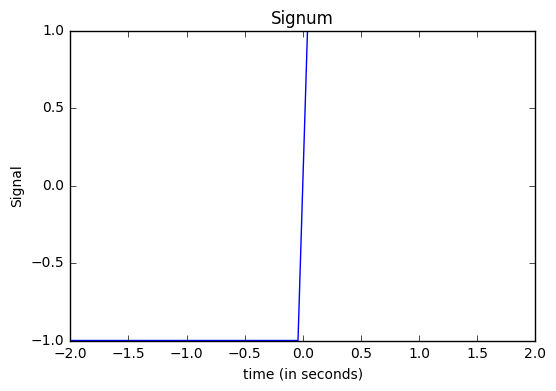

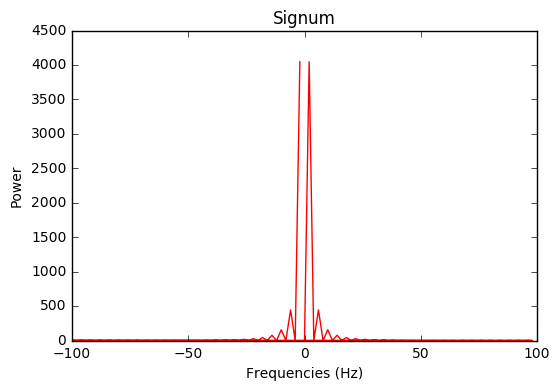

In [54]:
#SIGNUM
x = np.linspace(-2,2,100)
sgn = np.piecewise(x, [x>0, x==0, x<0], [1, 0, -1])
setup_graph(x_label='time (in seconds)', y_label='Signal', title='Signum')

plt.plot(x, sgn)

sgn_fft=fft(sgn)
sgn_power=np.square(np.abs(sgn_fft))
sgn_freq=fftfreq(len(sgn),1/200)
setup_graph(x_label='Frequencies (Hz)', y_label='Power', title='Signum')
plt.plot(sgn_freq, sgn_power, 'r')

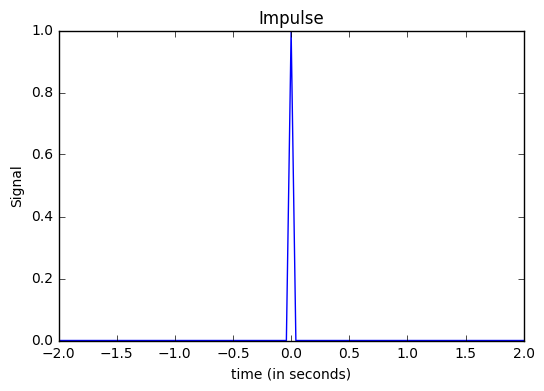

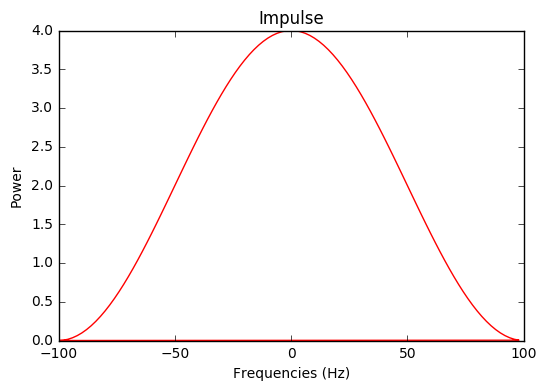

In [55]:
#IMPULSE
x = np.linspace(-2,0,50)
x= np.append(x, np.linspace(0,2,50))
imp= np.piecewise(x, [x==0, x!=0], [1, 0])
setup_graph(x_label='time (in seconds)', y_label='Signal', title='Impulse')

plt.plot(x, imp)

imp_fft=fft(imp)
imp_power=np.square(np.abs(imp_fft))
imp_freq=fftfreq(len(imp),1/200)
setup_graph(x_label='Frequencies (Hz)', y_label='Power', title='Impulse')
plt.plot(imp_freq, imp_power, 'r')

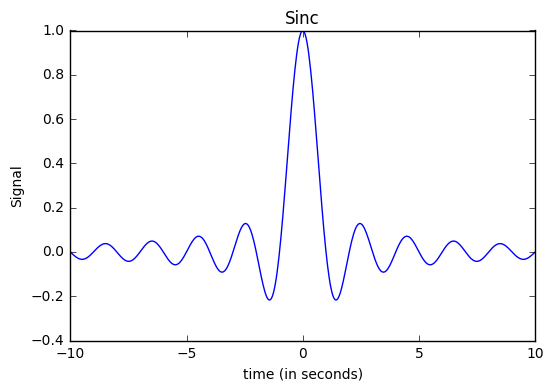

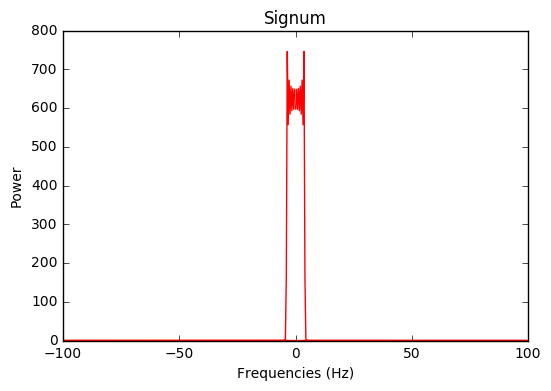

In [57]:
#SINC
x = np.linspace(-10,10,500)
sinc = np.sin(np.pi*x)/(np.pi*x)
setup_graph(x_label='time (in seconds)', y_label='Signal', title='Sinc')

plt.plot(x, sinc)

sinc_fft=fft(sinc)
sinc_power=np.square(np.abs(sinc_fft))
sinc_freq=fftfreq(len(sinc),1/200)
setup_graph(x_label='Frequencies (Hz)', y_label='Power', title='Signum')
plt.plot(sinc_freq, sinc_power, 'r')

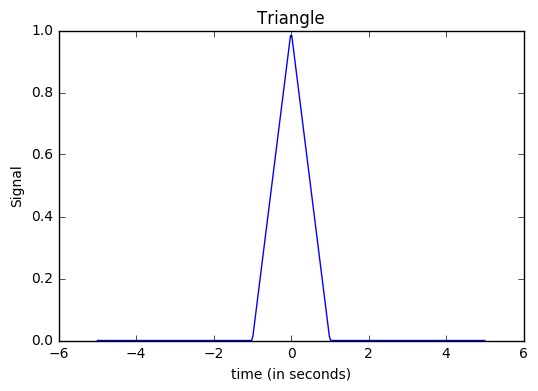

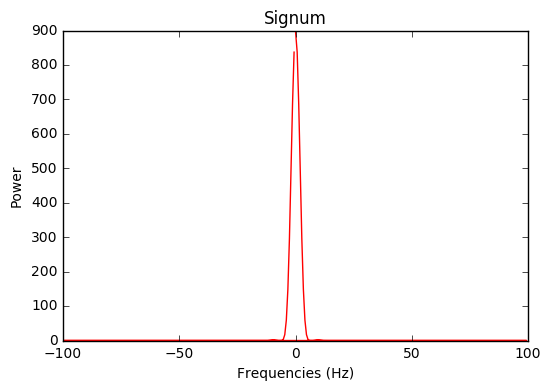

In [69]:
#TRIANGLE
x2 = np.linspace(-5,5,300)
condlist=[np.abs(x2)<1, np.abs(x2)>=1]
choicelist =[1-np.abs(x2), 0]
tri=np.select(condlist, choicelist)
#tri = np.piecewise(x2, [np.abs(x2)<1, np.abs(x2)>=1], [1-np.abs(x2), 0])
setup_graph(x_label='time (in seconds)', y_label='Signal', title='Triangle')

plt.plot(x2, tri)

tri_fft=fft(tri)
tri_power=np.square(np.abs(tri_fft))
tri_freq=fftfreq(len(tri),1/200)
setup_graph(x_label='Frequencies (Hz)', y_label='Power', title='Triangle')
plt.plot(tri_freq, tri_power, 'r')

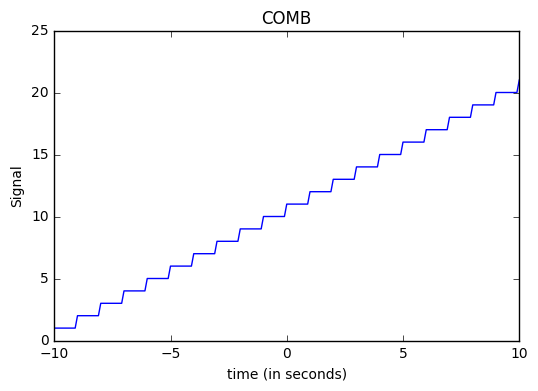

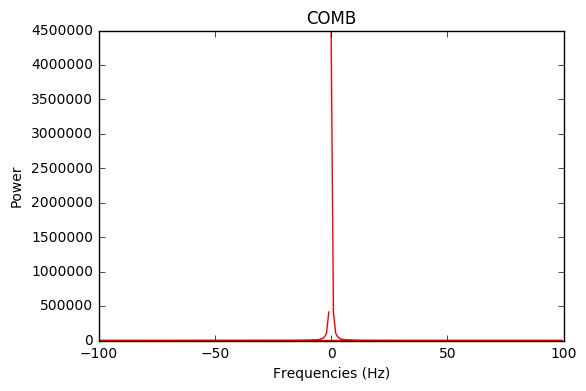

In [90]:
#COMB
x = np.linspace(-10,10,201)
k1= np.linspace(-10,10,201)
k=np.around(k1)
condlist=[x-k==0, x-k!=0]
choicelist =[1, 0]
comb1=np.select(condlist, choicelist)
comb=np.cumsum(comb1)

setup_graph(x_label='time (in seconds)', y_label='Signal', title='COMB')

plt.plot(x, comb)

comb_fft=fft(comb)
comb_power=np.square(np.abs(comb_fft))
comb_freq=fftfreq(len(comb),1/200)
setup_graph(x_label='Frequencies (Hz)', y_label='Power', title='COMB')
plt.plot(comb_freq, comb_power, 'r')